<a href="https://colab.research.google.com/github/yvrjsharma/Keras-edition-deux/blob/main/Keras_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentals of Machine Learning

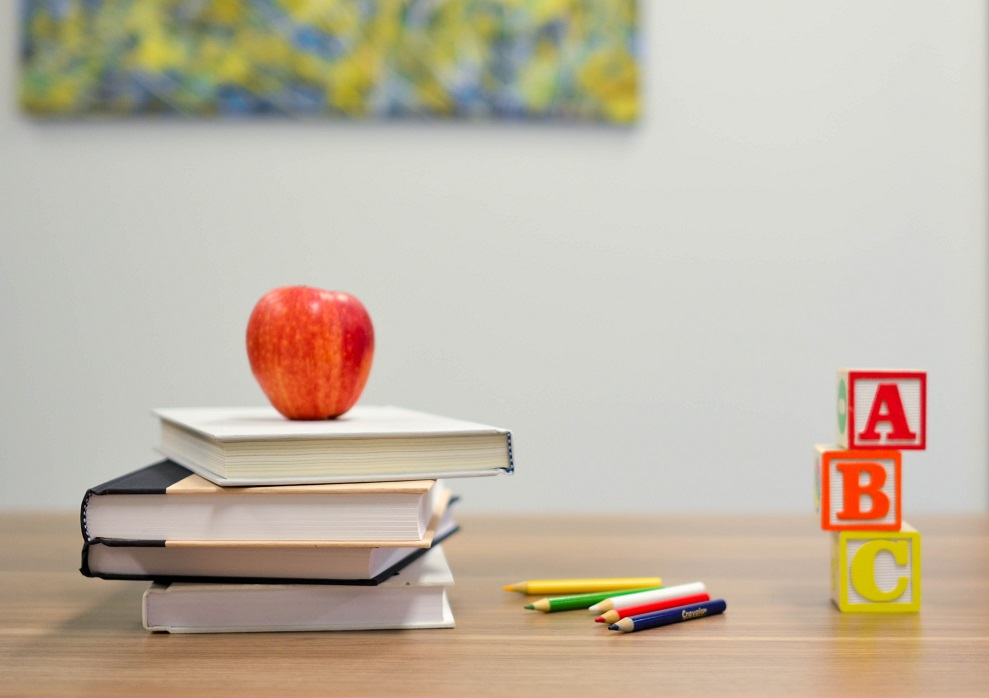

Photo by <a href="https://unsplash.com/@element5digital?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Element5 Digital</a> on <a href="https://unsplash.com/s/photos/building-blocks?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

Below notes cover :

* Whether you should generalize or optimize in ML

* How to evaluate a ML model

* Improving model fitting

* Better generalisation

## Generalization

*Optimization* refers to the process of adjusting a model to get the best performance possible on the training data. *Generalization* refers to the model's abilities to perform well on the yet unseen data. 

Overfitting is like a *central problem* in ML, while Generalization is like the *goal* of ML. A model overfits when its performance on never-before-seen data starts diverging from performance on the training data, which continues to improve as training goes on. 

  * When model overfits, it actually learns patterns that are specific to the training data.

  * A more robust model fit would ignore individual data points and look at bigger picture at ambiguos class baoundaries in training data.

  * Overfitting can happen when 
    * The train data is noisy -- when the independent features or images or test is mislabeld. 
    * Training data can also involve rare features or uncertainity -- example MNIST dataset has images of some of the letters or special characters along with digits. Another example of rarity in ttrainnig data would be having unique or very less frequently used words in some of the IMDB movie reviews. That is the reason why we picked only 10000 most used words in the last blog post / chapter.  
    * Training data is well labeeled but has outliers.
    * There is randomness or ambiguity in the input space, example same atmospheric conditions might or might not cause rains.  

Lets try adding noise to our MNIST dataset and inspect the model behaviour -

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

#Getting data, converting ints to floats and normalizing
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255 

#Adding noiose
train_images_with_noise_channels = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis=1)

#Adding zeros
train_images_with_zero_channels = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#training model from second chapter on this modified data
from tensorflow import keras
from tensorflow.keras import layers
def get_model():
  model = keras.Sequential([layers.Dense(512, "relu"),
                            layers.Dense(10,"softmax")])
  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model

model = get_model()
history_noise = model.fit(train_images_with_noise_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

model = get_model()
history_zeros = model.fit(train_images_with_zero_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

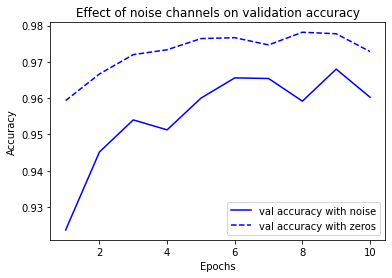

In [ ]:
#Ploting val accuracies for two noise channels
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]

epochs = range(1,11)

plt.plot(epochs, val_acc_noise, "b-", label="val accuracy with noise")
plt.plot(epochs, val_acc_zeros, "b--", label="val accuracy with zeros")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

By looking at above graph we can tell that the data with Noise features has the accuracy which is one point lower. Noise features eventually lead to overfitting. Sometime, it is importtant to reduce features and thus noise in your data by doing a *feature selection* before building yuour model. For example, we did this by selecting only 10000 most frequent words in the previous posts (IMDB movie review).

A very interesting observation would be that a *Deep Learning model* would learn to map any random innput data with randomly generated input labels given enough epochs. The results on validatrion group for such data will be totally off, as would make sense too. Thus, the nature of generalization of a DL model has much to do with the structure of information ratherpresented to them, than with the model/architectures themselves.



**The Manifold Hypothesis**

Francois explains this intuitive concept of manifold. Consider a space represented by all pixels values possible for 28*28 pixels with each pixel's value varying between 0 to 255. Now, intuitively the MNIST samples would occupy very small subspace off this parent space. He futher posits that this tiny subspace is highly structured, *continuus* meaning you can modify a sample digit a little and it will still be recognizable as the same digit, and lastly all samples in this subspace are conected meaning you can morph one digit image into another using some intermediate transformations. 

This subspace can be called a *manifold* or a closed space. A manifold is defined by the author as a llower-dimensional subspace of some parent space that is locally similar to a linear space. Further, **manifold hypothesis posits that all natural data lies on a low-dimensional manifold within the high-dimensional space where it is encoded**. This is the basis of why deep learning works at all. MNIST digits, human faces, human voice, natural language text all can be represented like this. 
* Manifold hypothesis implies ML models onlly have to fit to a low-dimensional subspace which is highly structured and lies inside a much bigger input space.
* Wintin a manifld, you can interpolate or morph one input to another via a *continuous* path as stated before in case of mnist. This interpolation capabillity is crucial to understand the **generalization** in Deep learninng.

**Interpolation**

The points that your model has never seen before (when it tries to **genaralize**) can be related to other close by avaialable points on the latent manifold space, sice data points in your manifold can interpolate. Paraphrasing author's words - you can make sense of totality of the space using only the sample of space available to you while training, you can use interpolation to fill in the blanks.

However, interpolation can only help you make sense of things that are very close to what model has seen before, it enavles **local generalization**. 

**What is a Deep earning model?**
**A Deep Learning model is what you put into it: The Architecture priors and the Data it was trained on.**

* A Deep Learning model is baically a very high dimensional curve, that is smoothand continuous since it needs to be differentriable. This curve is fitted to data points via gradient descent, smoppthly and incrementally. The smoothness of the curve helps approximating in the latent manifold from one point to another. 
* A Deep Learninig model, via its architecture priors (think LSTMs, CNNS, transformers *etc*), is structure in a way that mirrors the shape of the informationin its traoiininig data.
*Lastly, a Deep Neural Network structures its learned representations in an hierarchical and modular way, example CNN layers learninig lines, curves, and then shapes, and then eyes, nose, face ad then whole image.

All this discussion, makes it all the more clear that the more informative and less noisy your features are, the better you will be able to generalize since your input spacce will be simpler and more structired. Data Curatioon and feature engineering are essisentila to better generalization. 

**Regularizing Deep Learninig Models**

When you can't get more data to traiin your model on to improve its generalization abilities, you can work on modulating the quantity of information that the model is allowed to store meaning you can add constraints on the smoothness of your model curve. You can force your model this way to learn the most prominent patterns in the data which have a higher chance of generalizing well. This process of avoiding *Overfitting* is called *Regularization* 


## Evaluation 

How to evaluate your models. It is essential to be able to reliably measure the generalizationpower of your model.

**Validation Sets**
* You develop a model by tuning its configuration - example, number of layers, units in layers and so on. These are called *Hyperparameters* of the model.
* This tuning is done based on the performance on validation set, and can quickly turn into overfitting on the validation set as well.
* When you tune your model as per validation set, some **information leaks** from your "unseen" validatoion data into your model. Because of this at the end of the training you have a model whcih performs artificially well on the Valdation set because you have optimized it to do so.

**Test sets**
* You care about model's performance on totally unseen data thus you need a never before seen data to evaluate the model, this is called the Test dataset.

### Validation techniques

**Simple Holdout Validation**

Break your data into Train and Test sets. Tune your data on validation set, while training on train set. Validation set is created by breaking the train set into two parts(example, 20% train data as val data).
* Flaw : If only little data is available for training we are compromising with the model effective learning.
* If different random shuffling rounds of your train data before splitting end up yielding very different measures of model performance, then you can say the data size is too small and you should change this validation approach.

**K-Fold Validation**

* Above problem of small data can be addressed using this approach.
* You split your data into K-folds of equal sizes and for each partition train your model on remainning (K-1) partitions and use this one as valiadtion set to evaluate. FInal evaluation score is the average of the K scores you thus obtain at the end of the exercise.

**Iterated K-Fold Validation with Shuffling**

* Also implied in situations when you have very little train data is available.
* You shuffle your data and apply K-Fold validation on this data before shufling it again and applying K-Fold again. This process is repeated P times, and at the end your validation score is average of all scores and you have trained P*K number of times, which can be very expensicve and time consuming.

**Key points to keep in mind while doing train-validation splits**

* Data should bee representative of the same population in both train and val sets.
* If there is time based data being used, make sure your *shuffling* before splitting doesnt give future data points in train set. This woul lead to something called *temporal leak*
* There should be no redundancy of data points, meaning same data should not feature in train and validation sets. Make sure they are disjoint sets. 


*Keep in mind that there is always a tension between these facets of machine learning while building your best models - between optimization and generalization, and betweeen underfitting and overfitting.*

## Improve Your Model Fit

* First overfit your model, and then generalize.
* When you start training three things might happen -
  1. **Training loss doesn't decrease** meaning your training is not even geetting started or it is stuck. This is something that can always be resolved. Just remember we can even fit our model to a random trainig data.
    * It cab be due to choice of **Optimizer**, or 
    * Distribution of **intial weights**, or
    * **Learning rate** is one of the most likely causes. Too high lr will make gradient updates overshoot while too small lr would make improvment so slow that training might appear to stall, or
    * **Batch size**
  2. Training starts, but you cant generalize it.
  3. Training happens, both train and validation loss go down, but no overfitting happen over time. This would indicate you are still underfitting on the data.


Lets' observe the impact of Learninig Rate on model training using MNIST as example -


In [7]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

#getting train data, reshaping, normalizing
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255

#Defining model
model = keras.Sequential([layers.Dense(512, "relu"),
         layers.Dense(10, "softmax")])

#Define loss, optimizer(learning rate as 1.0), metrics
#Very high learning rate
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(1.),
              metrics=['accuracy'])

#Fitting over train data with Val split of 20%
model.fit(train_images, train_labels, epochs=15, batch_size=128, validation_split=0.2)


Epoch 1/15
375/375 [==============================] - 2s 4ms/step - loss: 856.0436 - accuracy: 0.3544 - val_loss: 2.5069 - val_accuracy: 0.2541
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 6.4056 - accuracy: 0.2184 - val_loss: 2.6180 - val_accuracy: 0.2317
Epoch 3/15
375/375 [==============================] - 1s 4ms/step - loss: 2.9747 - accuracy: 0.2369 - val_loss: 2.4865 - val_accuracy: 0.2198
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 2.7528 - accuracy: 0.2351 - val_loss: 2.5966 - val_accuracy: 0.2217
Epoch 5/15
375/375 [==============================] - 1s 4ms/step - loss: 2.3320 - accuracy: 0.2401 - val_loss: 3.0799 - val_accuracy: 0.2592
Epoch 6/15
375/375 [==============================] - 1s 4ms/step - loss: 2.8294 - accuracy: 0.2459 - val_loss: 2.1315 - val_accuracy: 0.2547
Epoch 7/15
375/375 [==============================] - 1s 4ms/step - loss: 2.4037 - accuracy: 0.2545 - val_loss: 2.3019 - val_accuracy: 0.3026
Epoc

* The model is stuck at the accuracy of around 25% with this high vallue of learnining rate.
* When we lower the value of **lr** to 1e-2, which is more realistic, and observe the results, we finnd that within 4 epochs the training accuracy has reached ~98%.
* A higher batch size will give gradients whcich are more informative and less noisy (low variance).

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

#getting train data, reshaping, normalizing
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255

#Defining model
model = keras.Sequential([layers.Dense(512, "relu"),
         layers.Dense(10, "softmax")])

#Define loss, optimizer(learning rate as 1e-2), metrics
#Very high learning rate
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(1e-2),
              metrics=['accuracy'])

#Fitting over train data with Val split of 20%
model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
375/375 [==============================] - 2s 4ms/step - loss: 0.3670 - accuracy: 0.9128 - val_loss: 0.1586 - val_accuracy: 0.9594
Epoch 2/5
375/375 [==============================] - 1s 4ms/step - loss: 0.1458 - accuracy: 0.9627 - val_loss: 0.2003 - val_accuracy: 0.9582
Epoch 3/5
375/375 [==============================] - 1s 4ms/step - loss: 0.1122 - accuracy: 0.9726 - val_loss: 0.1895 - val_accuracy: 0.9678
Epoch 4/5
375/375 [==============================] - 1s 4ms/step - loss: 0.1029 - accuracy: 0.9778 - val_loss: 0.1687 - val_accuracy: 0.9708
Epoch 5/5
375/375 [==============================] - 1s 4ms/step - loss: 0.0926 - accuracy: 0.9812 - val_loss: 0.1930 - val_accuracy: 0.9697


For the second case, when **Training starts, but you cant generalize it** or the validation loss isn't decreasing for some reason, it can be that someting is fundamentally wrong with your approach like your input data dosent have enough information to predict the targets, or the model architecture that you are using is not suited for the problem at hand (for example recurrent networks can deal better with word sequence input type a fully connected netwrok).

Lastly, when your **model loss for trainng and validation set is still going down** but very slowly, you need to *make your model to overfit*. 
* When the model doesnt overfit, it happens because the model lacks the *representational power* - meaning you need a bigger model.
* Model can be made bigger in terms of adding more layers, or by using bigger layers with higher number of units in them, or using different architecture priors altogether.

Training a bigger model on MNIST - you can see that the model validation loss first decreases and then increases after 8th epoch. Thats when overfitting started to happen.

In [ ]:
#model with two hidden layers this time
model = keras.Sequential([layers.Dense(96, "relu"),
                         layers.Dense(96, "relu"),
                         layers.Dense(10, "softmax")])

model.compile(loss="sparse_categorical_crossentropy",optimizer="rmsprop", metrics=["accuracy"])

history_larger_model = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Text(0, 0.5, 'Val loss')

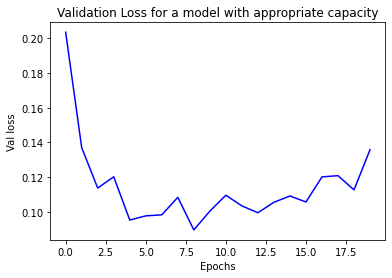

In [14]:
import matplotlib.pyplot as plt

epochs = range(0,20)
plt.plot(epochs, history_larger_model.history['val_loss'], "b-")
plt.title("Validation Loss for a model with appropriate capacity")
plt.xlabel("Epochs")
plt.ylabel("Val loss")